In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [61]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [62]:
df=pd.read_json('/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json',lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [63]:
df.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


In [64]:
df.shape

(28619, 3)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [66]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

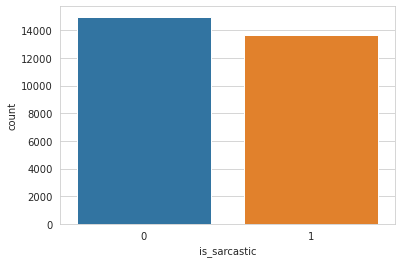

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df);

In [68]:
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
vocab_size = 10000
oov_tok = '<00V>'
max_length = 120
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 16
num_epochs = 10

In [70]:
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(X_train)
training_padded=pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences=tokenizer.texts_to_sequences(X_test)
testing_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=30, 
                    verbose=2)

Epoch 1/30
716/716 - 4s - loss: 0.6542 - accuracy: 0.6121 - val_loss: 0.5264 - val_accuracy: 0.7647
Epoch 2/30
716/716 - 3s - loss: 0.4051 - accuracy: 0.8344 - val_loss: 0.3771 - val_accuracy: 0.8372
Epoch 3/30
716/716 - 3s - loss: 0.3092 - accuracy: 0.8759 - val_loss: 0.3537 - val_accuracy: 0.8410
Epoch 4/30
716/716 - 3s - loss: 0.2627 - accuracy: 0.8963 - val_loss: 0.4060 - val_accuracy: 0.8145
Epoch 5/30
716/716 - 3s - loss: 0.2307 - accuracy: 0.9102 - val_loss: 0.3366 - val_accuracy: 0.8529
Epoch 6/30
716/716 - 3s - loss: 0.2059 - accuracy: 0.9199 - val_loss: 0.3433 - val_accuracy: 0.8492
Epoch 7/30
716/716 - 2s - loss: 0.1848 - accuracy: 0.9301 - val_loss: 0.3514 - val_accuracy: 0.8508
Epoch 8/30
716/716 - 2s - loss: 0.1679 - accuracy: 0.9384 - val_loss: 0.3784 - val_accuracy: 0.8464
Epoch 9/30
716/716 - 2s - loss: 0.1541 - accuracy: 0.9431 - val_loss: 0.3847 - val_accuracy: 0.8435
Epoch 10/30
716/716 - 2s - loss: 0.1427 - accuracy: 0.9483 - val_loss: 0.3985 - val_accuracy: 0.8436

In [73]:
def plot_acc(model,epochsnum):
    df_m=pd.DataFrame(model.history.history)
    df_m['Epoch']=range(1,epochsnum+1)
    df_m.index=df_m['Epoch']
    score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
    print('Test accuracy:', score[1])
    plt.plot(df_m['loss'])
    plt.plot(df_m['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.show()

90/90 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.8157
Test accuracy: 0.8156883120536804


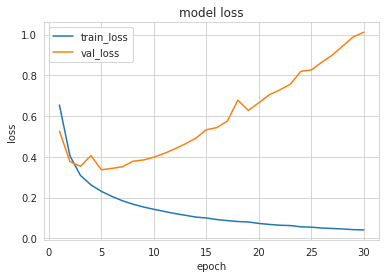

In [74]:
plot_acc(model=model,epochsnum=30)

In [75]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.summary()
# train model
history= model2.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                46104     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 206,129
Trainable params: 206,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
716/716 - 4s - loss: 0.4307 - accuracy: 0.7899 - val_loss: 0.3181 - val_accuracy: 0.8632
Epoch 2/10
716/716 - 3s - loss: 0.2005 - accuracy: 0.9201 - val_loss: 0.3072 - val_accuracy: 0.8671
Epoch 3/10
716/716 - 3s - loss: 0.1117 - accur

In [77]:
plot_acc(model=model2,epochsnum=30)

ValueError: Length of values (30) does not match length of index (10)

In [ ]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

In [ ]:
history = model_lstm.fit(training_padded, 
                    y_train, 
                    validation_data=(testing_padded, y_test), 
                    epochs=10, 
                    verbose=2)

In [ ]:
plot_acc(model=model_lstm,epochsnum=10)